# Neural networks for audio classification

## Part 1: Dataset inspection

The first step is always visualising our data. We have ignored this for the sake of having more time for audio processing so far. We will load a dataframe that contains metadata about our dataset as well as the file paths and investigate it in this section.

In [1]:
%matplotlib inline

In [2]:
from config import *
import pandas as pd
from utility import keep_only_n_unknowns, pad_signal, augment_audio, get_callbacks
import matplotlib.pyplot as plt

In [3]:
## Load the dataframe
df_all = pd.read_pickle(data_dir + 'df_all.pkl')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80945 entries, 0 to 80944
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_path      80945 non-null  object
 1   keyword        80945 non-null  object
 2   dataset        80945 non-null  object
 3   speaker_id     80945 non-null  object
 4   speaker_ut     80945 non-null  object
 5   label_one_hot  80945 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


## Exercise 1
1. Visualize the dataset. How are the recordings distributed in terms of **"keyword"** and **"speaker_id"**? Are there many different speakers?
2. Would you adjust the class distribution? Set the "balance_out" variable to **True** or **False**.

## Hints
- Useful commands **-** df.describe, df['column'].value_counts
- Single columns can be selected by passing their name as a string: df['name']
- Columns of dataframes can be selected by passing a list of strings: df[name_list]
- A pandas series object (column of a data frame) has a **"plot"** method that can be helpful, **Use:**  `.plot(kind='bar')`.

## Solution

### E1 
1. The **"describe"** command below shows, that we have something like $2500$ unique speakers with roughly a maximum of $25$ (speak_ut unique value) utterances per keyword each. The **freq** column also tells us that our top recording speaker has $232$ recordings over all keywords.

In [4]:
## select the columns of interest and print some statistics
df_all[['keyword', 'speaker_id', 'speaker_ut']].describe()

,keyword,speaker_id,speaker_ut
count,80945,80945,80945
unique,12,2589,24
top,unknown,c50f55b8,0
freq,38546,232,35120


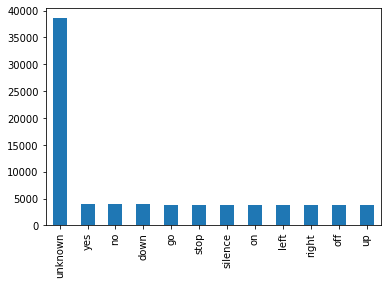

In [5]:
## for all speakers, plot the keyword distribution as histogram
df_all['keyword'].value_counts().plot(kind='bar');

### E2
We can see from the bar chart that we have many examples of the **unknown** keyword and the other classes are well balanced. Well balanced datasets are always preferable since the model training might be influenced by the inbalanced data distribution. 

In [6]:
balance_out = True

## Part 2: Data loading

We need to set up a pipeline that loads the data into memory and provides it to Keras `model.fit()` function that will later perform the training. But first we will split our dataset into $3$ distinct sets. This will be useful for training later. 

## Train-test split
The dataset has already been split up for us into train, test and evaluation set. We will train the model on the training set and evaluate its performance on the evaluation set later.

In [7]:
## Balance out the dataset
if balance_out:
    df_all = keep_only_n_unknowns(df_all, 10)
    df_all.keyword.value_counts()

new dataframe has  4239 unknown utterances


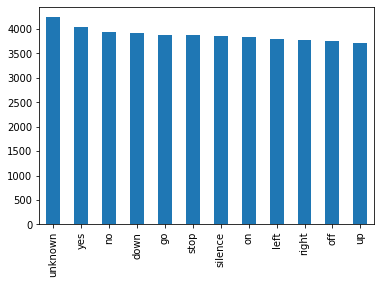

In [8]:
df_all['keyword'].value_counts().plot(kind='bar');

In [9]:
#pd.read_pickle(data_dir + 'df_all.pkl')
df_all.to_pickle(data_dir + 'df_all_balanced_split.pkl')